In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Silahkan download datanya disini https://drive.google.com/file/d/16_FWa1zZqlekDkK2UhN7fhsQLNFJzG8q/view?usp=sharing
Disini kita akan membuat customer segmentation dari data customer sebuah toko kredit di Mall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Mall_Customers.csv', index_col='CustomerID')
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Untuk saat ini kita pilih data angka saja

In [ ]:
#Mengambil data dari dataframe untuk dijadikan vektor
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#Karena standar besar/kecil di kedua variabel berbeda, maka kita standarisasi dulu
#penjelasan detail akan dibahas di minggu selanjutnya
X = StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# K-Means Clustering

In [ ]:
!pip install -U yellowbrick

In [ ]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Tugas 1 :  Menggunakan metode elbow untuk menentukan jumlah cluster yang tepat

Buat elbow dengan cara berikut :     

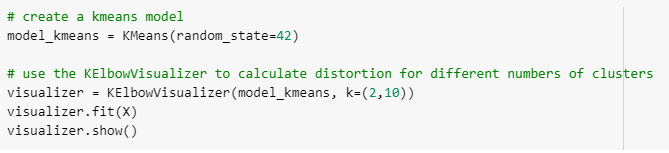

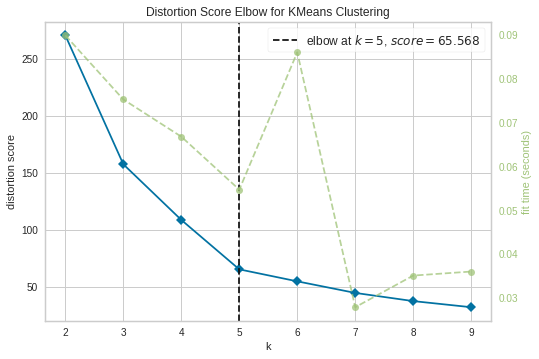

In [ ]:
# create a kmeans model
#Type Your Code Here
model_kmeans = KMeans(random_state=42)

# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(model_kmeans, k=(2,10))
visualizer.fit(X)
visualizer.show()

Terlihat titik elbow yang tepat ada pada k=5

## Tugas 2 :    Buat model clustering

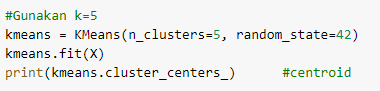

In [ ]:
#Gunakan k=5
#Type Your Code Here
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)      #centroid

[[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]


## Tugas 3 :   Visualisasi

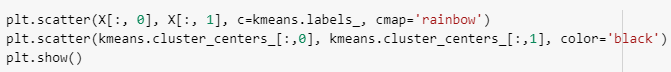

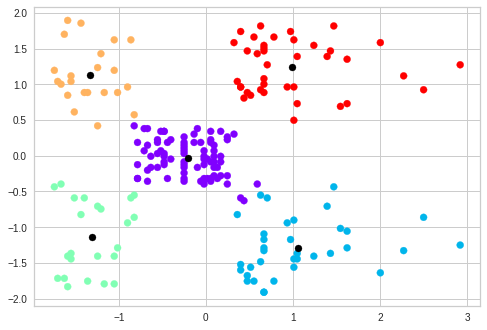

In [ ]:
#Type Your Code Here
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show()

Disini terlihat model sudah cukup bagus, mari kita input ke data

In [ ]:
data['cluster_kmeans'] = label_kmeans
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
...,...,...,...,...,...
196,Female,35,120,79,4
197,Female,45,126,28,1
198,Male,32,126,74,4


## Evaluasi silhouette score

In [ ]:
ss_kmeans = silhouette_score(X, label_kmeans, metric='euclidean')
print('nilai silhouette score untuk Kmeans Clustering = ', ss_kmeans)

nilai silhouette score untuk Kmeans Clustering =  0.5546571631111091
